![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='BLUE'>Cientista de Dados na Prática </font>
##<font color='BLUE'>  Machine Learning </font>


## <font color='GREY'>1° Problema de Negócio</font>

##<font color='BLACK'>**Previsão de Doenças Cardiacas** (Resolvendo problemas de Classificação Binária):
</font> 


Vamos criar um modelo preditivo que seja capaz de **prever se uma pessoa pode ou não desenvolver doenças do coração**. Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo. Este dataset descreve os registros médicos entre pacientes e cada registro está marcado se o paciente desenvolveu ou não doenças do coração.



 


![alt text](https://mir-s3-cdn-cf.behance.net/project_modules/disp/19d6b946017221.584577bc3cd67.gif)

### Informações sobre os atributos:

1. dores_peito
2. pressao_arterial
3. colesterol
4. acucar_sangue
5. med_eletrocardio
6. freq_cadiaca_max
7. angina_induzida
8. talassemia_sangue
9. class

## Extraindo e Carregando os Dados

Existem diversas considerações ao se carregar dados para o processo de Machine Learning. Por exemplo: seus dados possuem um header (cabeçalho)? Caso negativo, você vai precisar definir o título para cada coluna. Seus arquivos possuem comentários? Qual o delimitador das colunas? Alguns dados estão entre aspas, simples ou duplas?

In [ ]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
from pandas import read_csv
arquivo = 'cardio.csv'
colunas = ['dor_peito', 'pressao_arterial', 'colesterol', 'acucar_sangue', 'med_eletrocardio', 'freq_cadiaca_max', 'angina_induzida', 'talassemia_sangue', 'class']
dados = read_csv(arquivo, names = colunas, header=0)
print(dados.shape)

(768, 9)


# 2° Análise Exploratória dos Dados

###Conhecendo o Pandas Profiling

In [ ]:
!pip install -U pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(dados, title='Relatório- Base de Dados',html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file(output_file="Relatório- Base de Dados.html")

### Estatística Descritiva

In [ ]:
# Visualizando as primeiras 20 linhas
dados.head(3)

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cadiaca_max,angina_induzida,talassemia_sangue,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto de dados maior e depois aplique o modelo a novos dados.


O tipo dos dados é muito importante. Pode ser necessário converter strings, ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.

In [ ]:
# Tipo de dados de cada atributo
dados.dtypes

Em problemas de classificação pode ser necessário balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento. Podemos ver abaixo que existe uma clara desproporção entre as classes 0 (não ocorrência de doenças cardíacas) e 1 (ocorrência de doenças cardíacas).

In [ ]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [ ]:
# Correlação de Pearson
dados.corr(method = 'pearson')

,dor_peito,pressao_arterial,colesterol,acucar_sangue,med_eletrocardio,freq_cadiaca_max,angina_induzida,talassemia_sangue,class
dor_peito,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
pressao_arterial,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
colesterol,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
acucar_sangue,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
med_eletrocardio,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
freq_cadiaca_max,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
angina_induzida,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
talassemia_sangue,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [ ]:
# Verificando o skew de cada atributo
dados.skew()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


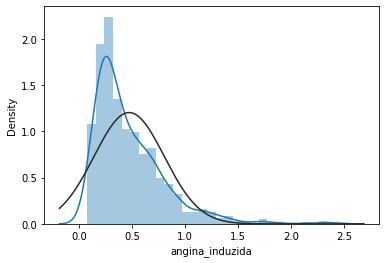

In [ ]:
import seaborn as sns
from scipy import stats
sns.distplot(dados.angina_induzida, fit = stats.norm);

# 3° Pré-Processamento dos Dados

### Preparando os Dados para Machine Learning

Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.

É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

## Normalização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [ ]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Carregando os dados
arquivo = 'cardio.csv'
colunas = ['dor_peito', 'pressao_arterial', 'colesterol', 'acucar_sangue', 'med_eletrocardio', 'freq_cadiaca_max', 'angina_induzida', 'talassemia_sangue', 'class']
dados = read_csv(arquivo, names = colunas,header=0)
array = dados.values



In [ ]:
# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:8]
Y = array[:,8]



In [ ]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

In [ ]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


## Amostragem

Você precisa saber se seu modelo preditivo vai funcionar bem quando receber novos dados. A melhor maneira de avaliar a performance do modelo é fazer previsões em dados que você já conhece o resultado. Outra maneira de testar a performance do seu modelo é utilizar técnicas estatísticas como métodos de amostragem que permitem você estimar quão bem seu modelo irá fazer previsões em novos dados.

A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Isso não garante performance. Após avaliar o modelo, nós podemos treiná-lo novamente com os dados de treino e então prepará-lo para uso operacional em produção. Existem diversas técnicas para isso e estudaremos duas aqui: Conjunto de dados de treino e de teste e Cross Validation.

### Dados de Treino e de Teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [ ]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)



# 4° Machine Learning - Construindo a Maquina Preditiva

## Regressão Logística

O algoritmo de Regressão Logística assume que seus dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária. Esse é um dos algorítmos de Machine Learnig mais simples.  

### Modelo 1 (BaseLine) - Criando Modelo com Cross Validation 

In [ ]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn as sl
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
sl.__version__

# Definindo os valores para o número de folds
num_folds = 5
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.820


### Modelo 2 - Criando Modelo com Train Test Split

In [ ]:
# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 78.740%


# 5° Avaliando a Acurácia Final da Máquina Preditiva                 Escolhida para Produção

In [ ]:
# Make predictions on validation dataset
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)
predictions = modelo.predict(X_teste)

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_teste, predictions))
print(confusion_matrix(Y_teste, predictions))






# Obrigado!

### #Instagram - Ciencia dos Dados <a href="http://instagram.com/cienciadosdados">instagram.com/cienciadosdados</a>